In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
import gc
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
import datetime as dt




In [2]:
try:del crime # Being nice to Azure
except:pass;gc.collect()

In [3]:
crime = pd.read_csv("./Crime_Reports.csv" , parse_dates=["Occurred Date Time","Report Date Time"])

In [62]:
crime.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Report Date Time,Location Type,Address,Zip Code,Council District,APD Sector,Clearance Status,X-coordinate,Y-coordinate,Latitude,Longitude
0,DISTURBANCE - OTHER,3401,N,2019-09-21 21:13:00,2019-09-21 21:13:00,RESIDENCE / HOME,2205 WIRTZ AVE,78704,9,DA,O,3107244.0,3107244.0,30.246032,-97.765791
1,HARASSMENT,2703,N,2019-09-21 19:39:00,2019-09-21 19:39:00,RESIDENCE / HOME,9809 HANSFORD DR,78753,4,ED,U,3133312.0,3133312.0,30.360981,-97.680054
2,FAMILY DISTURBANCE,3400,N,2019-09-21 19:13:00,2019-09-21 19:13:00,RESIDENCE / HOME,2717 S LAMAR BLVD,78704,5,DA,U,3102594.0,3102594.0,30.243394,-97.780591
3,HARASSMENT,2703,N,2019-09-21 18:57:00,2019-09-21 20:17:00,RESIDENCE / HOME,5921 RED BUD RIDGE LN,78744,2,FR,U,3116190.0,3116190.0,30.189894,-97.738960
4,DISTURBANCE - OTHER,3401,N,2019-09-21 18:00:00,2019-09-21 18:20:00,UNKNOWN,500 NECHES ST,78701,9,GE,U,3115647.0,3115647.0,30.265956,-97.738637


In [5]:
#info about data set
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108362 entries, 0 to 108361
Data columns (total 27 columns):
Incident Number                108362 non-null float64
Highest Offense Description    108362 non-null object
Highest Offense Code           108362 non-null int64
Family Violence                108362 non-null object
Occurred Date Time             108362 non-null datetime64[ns]
Occurred Date                  108362 non-null object
Occurred Time                  108362 non-null int64
Report Date Time               108362 non-null datetime64[ns]
Report Date                    108362 non-null object
Report Time                    108362 non-null int64
Location Type                  107996 non-null object
Address                        108362 non-null object
Zip Code                       107272 non-null float64
Council District               106883 non-null float64
APD Sector                     107663 non-null object
APD District                   107626 non-null object
PRA      

In [6]:
#missing data
total = crime.isnull().sum().sort_values(ascending=False)
percent = (crime.isnull().sum()/crime.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category Description,67476,0.622691
UCR Category,67476,0.622691
Clearance Date,14924,0.137724
Clearance Status,14921,0.137696
Location,2246,0.020727
Latitude,2246,0.020727
Longitude,2246,0.020727
Council District,1479,0.013649
Zip Code,1090,0.010059
Census Tract,1090,0.010059


In [4]:
crime.drop(['Incident Number', 'Occurred Time', "Report Date",'Occurred Date','Report Time','UCR Category'], inplace=True, axis=1)

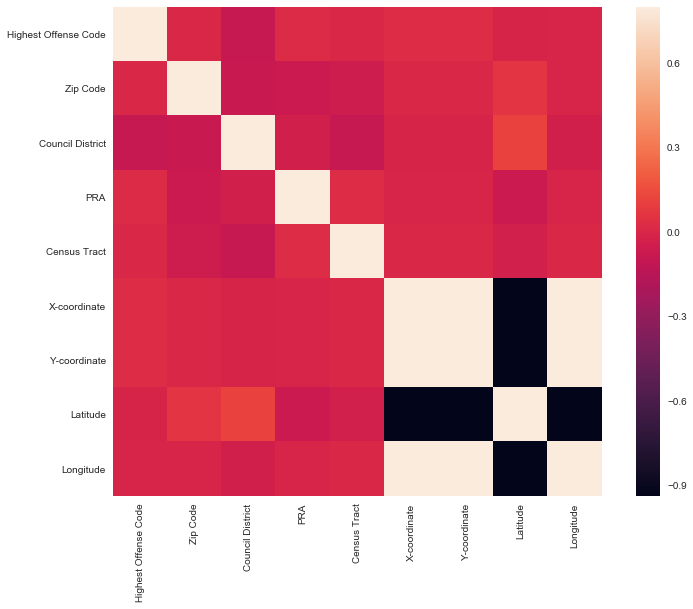

In [23]:
#correlation matrix
corrmat = crime.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [24]:
corrmat

,Highest Offense Code,Zip Code,Council District,PRA,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude
Highest Offense Code,1.000000,0.007024,-0.088582,0.022749,0.007052,0.028635,0.028635,-0.011564,-0.002882
Zip Code,0.007024,1.000000,-0.080688,-0.071770,-0.058226,0.006308,0.006308,0.062660,-0.002730
Council District,-0.088582,-0.080688,1.000000,-0.038501,-0.085306,-0.013650,-0.013650,0.118550,-0.036573
PRA,0.022749,-0.071770,-0.038501,1.000000,0.031892,-0.005157,-0.005157,-0.075324,-0.005607
Census Tract,0.007052,-0.058226,-0.085306,0.031892,1.000000,0.007939,0.007939,-0.031308,0.008761
X-coordinate,0.028635,0.006308,-0.013650,-0.005157,0.007939,1.000000,1.000000,-0.938364,0.999949
Y-coordinate,0.028635,0.006308,-0.013650,-0.005157,0.007939,1.000000,1.000000,-0.938364,0.999949
Latitude,-0.011564,0.062660,0.118550,-0.075324,-0.031308,-0.938364,-0.938364,1.000000,-0.936088
Longitude,-0.002882,-0.002730,-0.036573,-0.005607,0.008761,0.999949,0.999949,-0.936088,1.000000


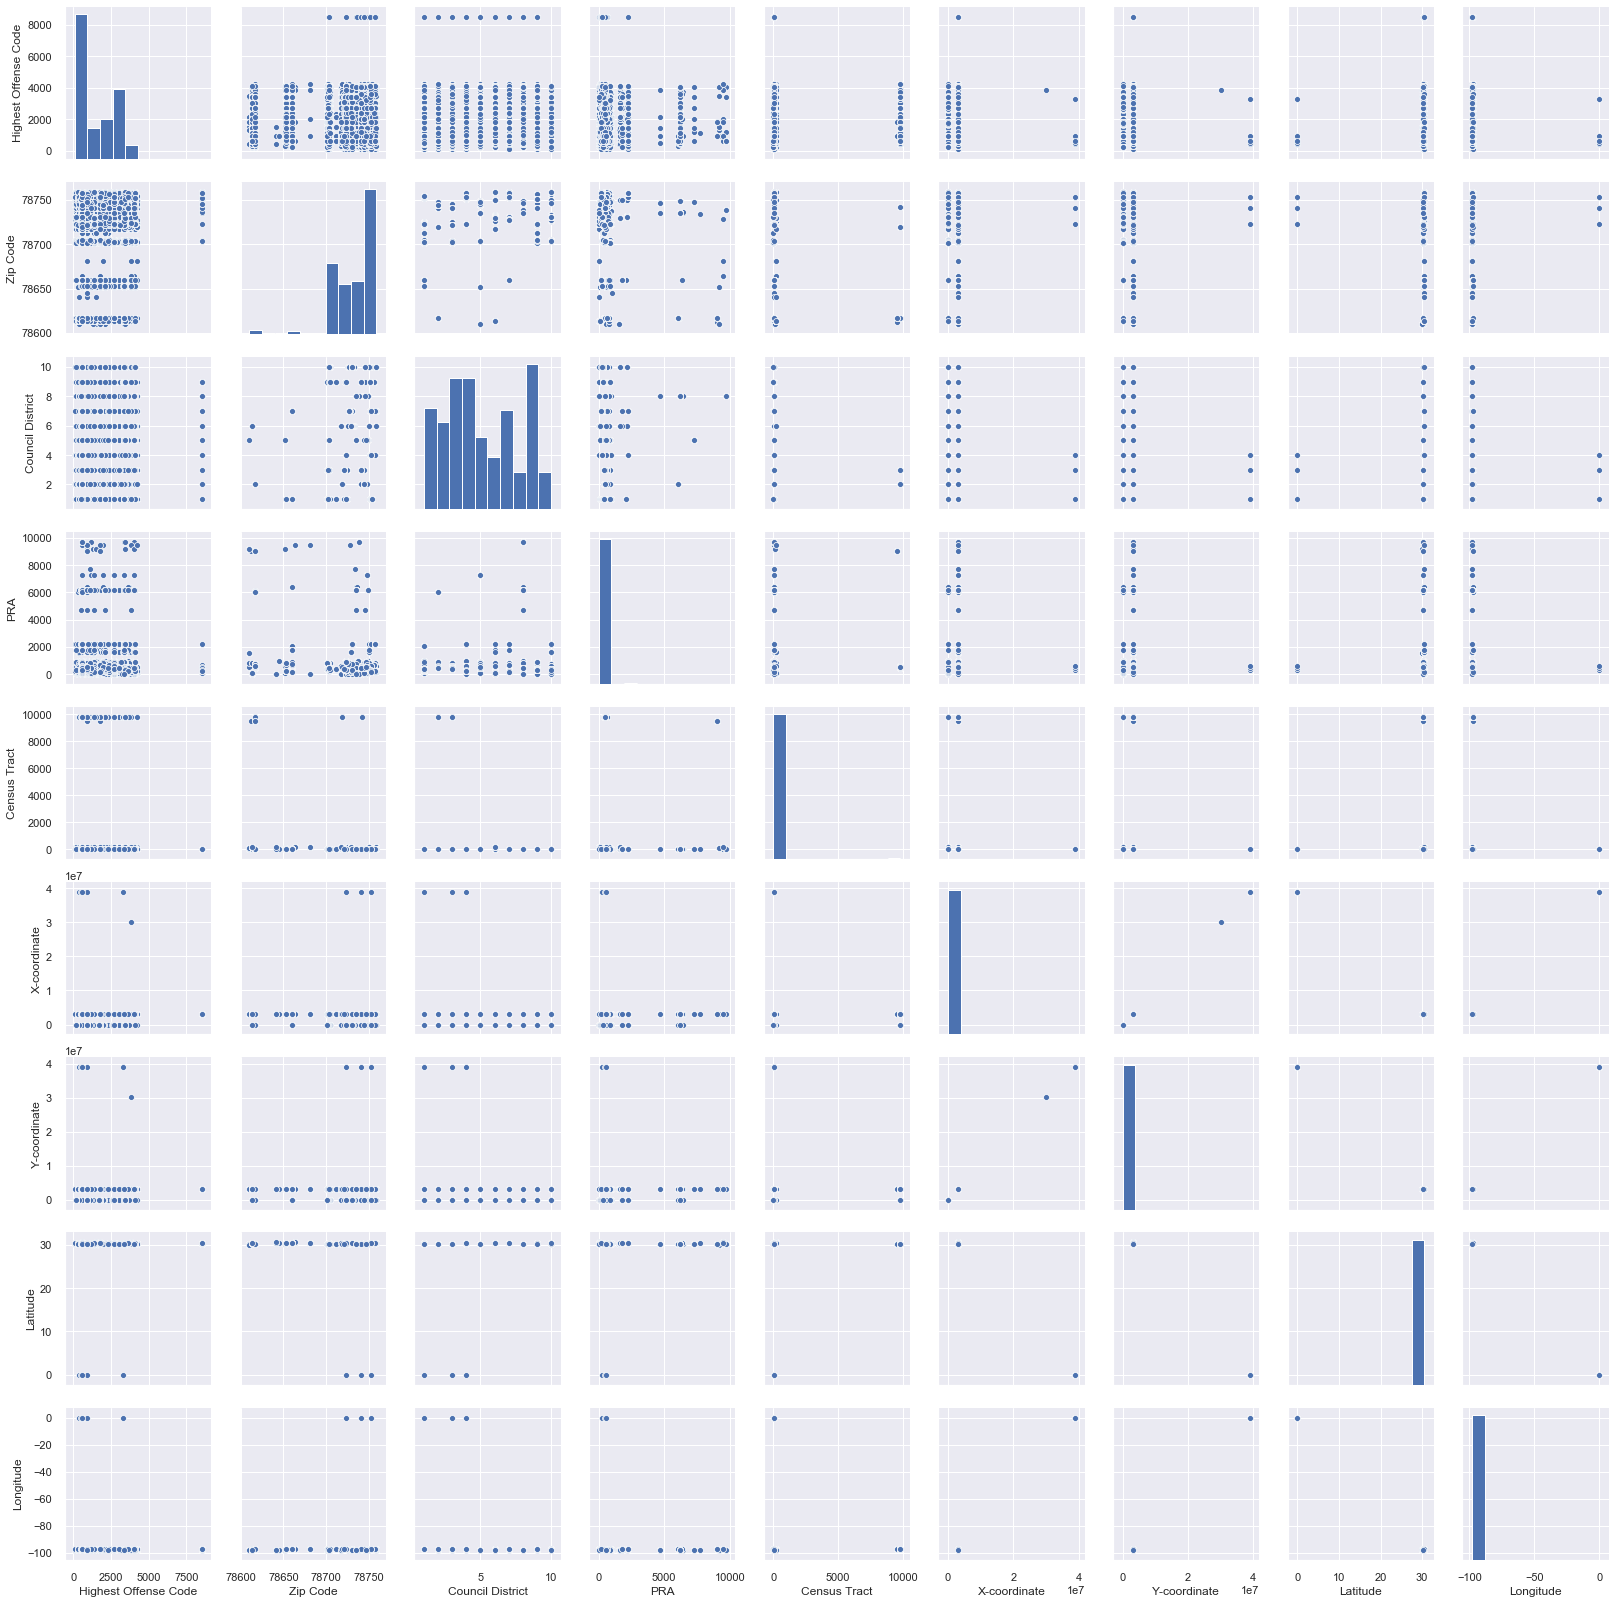

In [27]:
sns.set()
sns.pairplot(crime, height = 2.5)
plt.show();

In [61]:
crime.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Report Date Time,Location Type,Address,Zip Code,Council District,APD Sector,Clearance Status,X-coordinate,Y-coordinate,Latitude,Longitude
0,DISTURBANCE - OTHER,3401,N,2019-09-21 21:13:00,2019-09-21 21:13:00,RESIDENCE / HOME,2205 WIRTZ AVE,78704,9,DA,O,3107244.0,3107244.0,30.246032,-97.765791
1,HARASSMENT,2703,N,2019-09-21 19:39:00,2019-09-21 19:39:00,RESIDENCE / HOME,9809 HANSFORD DR,78753,4,ED,U,3133312.0,3133312.0,30.360981,-97.680054
2,FAMILY DISTURBANCE,3400,N,2019-09-21 19:13:00,2019-09-21 19:13:00,RESIDENCE / HOME,2717 S LAMAR BLVD,78704,5,DA,U,3102594.0,3102594.0,30.243394,-97.780591
3,HARASSMENT,2703,N,2019-09-21 18:57:00,2019-09-21 20:17:00,RESIDENCE / HOME,5921 RED BUD RIDGE LN,78744,2,FR,U,3116190.0,3116190.0,30.189894,-97.738960
4,DISTURBANCE - OTHER,3401,N,2019-09-21 18:00:00,2019-09-21 18:20:00,UNKNOWN,500 NECHES ST,78701,9,GE,U,3115647.0,3115647.0,30.265956,-97.738637


In [59]:
#fill na values with UN(Unknown)
crime["APD Sector"] = crime["APD Sector"].fillna(value="UN")

In [54]:
crime["Clearance Date"] = crime["Clearance Date"].fillna(value=crime["Occurred Date Time"]) 

In [57]:
#Drop clearance date due to high number of missing values
crime.drop(["Clearance Date"],axis=1,inplace=True)

In [9]:
#Converting zip code to int and fill na values
crime["Zip Code"] = crime["Zip Code"].fillna(0.0).apply(np.int64)


In [19]:
crime.drop(["APD District"],axis=1,inplace=True)

In [22]:
#Refering to the census tract website, we find that all of these belong to Travis county , so we can drop the column.
crime.drop(["Census Tract"],axis=1,inplace=True)

In [24]:
#Fill missing Location type values with UNKNOWN
crime["Location Type"] = crime["Location Type"].fillna(value="UNKNOWN")

In [31]:
#C=Cleared by Arrest O=Cleared by Exception N=Not cleared u =Unknown
crime["Clearance Status"] = crime["Clearance Status"].fillna(value="U")

In [33]:
crime.drop(["Category Description"],axis=1,inplace=True)

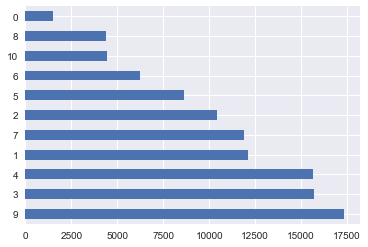

In [41]:
#Austin has 10 districts and district seems to be most unsafe district due to the number of crimes
crime["Council District"].value_counts().plot(kind="barh")

In [37]:
crime["Council District"] = crime["Council District"].fillna(0.0).apply(np.int64)

In [43]:
#Location is same as Latitude & Longitude
crime.drop(["Location"],axis=1,inplace=True)

In [50]:
crime.drop(["PRA"],axis=1,inplace=True)

In [66]:
crime_final = crime.to_csv("./crime_cleaned.csv", header= True)

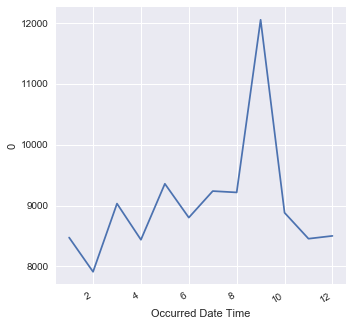

In [29]:
g = sns.relplot(x='Occurred Date Time', y=0, kind="line", data=a)
g.fig.autofmt_xdate()

In [11]:
crime_2019 = crime[crime["Occurred Date Time"].dt.year == 2019]

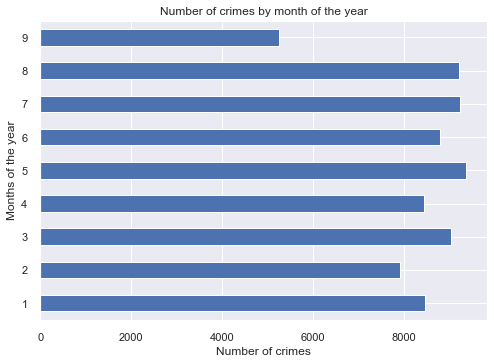

In [51]:
crime_2019.groupby([crime_2019["Occurred Date Time"].dt.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

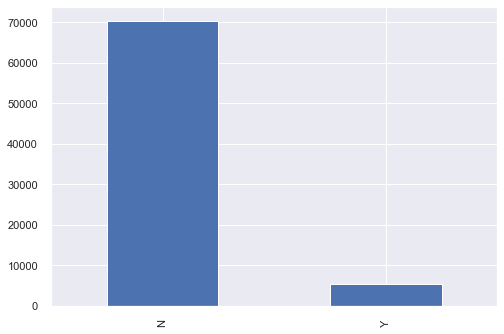

In [49]:
crime_2019["Family Violence"].value_counts().plot(kind="bar")

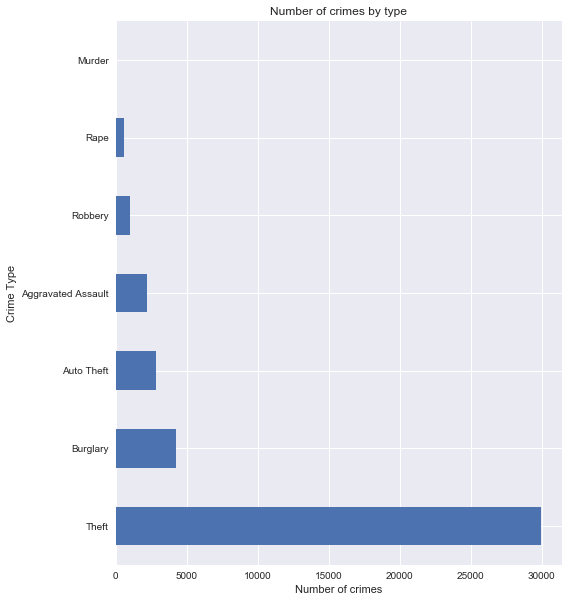

In [52]:
plt.figure(figsize=(8,10))
crime.groupby([crime['Category Description']]).size().sort_values(ascending=False).head(40).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

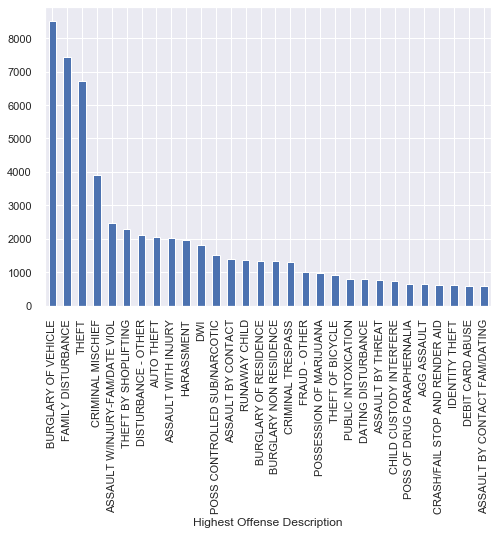

In [45]:
crime_2019.groupby([crime_2019['Highest Offense Description']]).size().sort_values(ascending=False).head(30).plot(kind="bar")

In [70]:
crime.drop(['Incident Number', 'Occurred Time', 'Report Time','UCR Category'], inplace=True, axis=1)

In [79]:
crime.head()

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Report Date Time,Report Date,Location Type,Address,Zip Code,...,PRA,Census Tract,Clearance Status,Clearance Date,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
94390,AGG ASLT STRANGLE/SUFFOCATE,410,Y,2018-10-25 21:05:00,10/25/2018,2018-10-25 22:57:00,10/25/2018,RESIDENCE / HOME,301 E APPLEGATE DR,78753.0,...,240.0,18.23,N,11/1/2018,Aggravated Assault,3131609.0,3131609.0,30.370505,-97.685194,"(30.37050462, -97.68519365)"
26005,AGG ASSAULT,402,Y,2019-06-22 19:58:00,6/22/2019,2019-06-22 19:58:00,6/22/2019,RESIDENCE / HOME,1730 E OLTORF ST,78741.0,...,456.0,14.03,C,6/25/2019,Aggravated Assault,3116318.0,3116318.0,30.232921,-97.737399,"(30.23292142, -97.73739875)"
90888,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,2018-11-06 22:06:00,11/6/2018,2018-11-06 22:06:00,11/6/2018,RESIDENCE / HOME,1501 REAGAN HILL DR,78752.0,...,266.0,18.11,C,11/7/2018,Aggravated Assault,3130394.0,3130394.0,30.326287,-97.690259,"(30.32628674, -97.6902594)"
59818,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,2019-02-27 02:04:00,2/27/2019,2019-02-27 02:04:00,2/27/2019,RESIDENCE / HOME,12342 HUNTERS CHASE DR,78729.0,...,165.0,204.10,N,3/5/2019,Aggravated Assault,3103620.0,3103620.0,30.442867,-97.772050,"(30.4428668, -97.77205005)"
62103,AGG ASLT STRANGLE/SUFFOCATE,410,Y,2019-02-18 17:47:00,2/18/2019,2019-02-18 17:47:00,2/18/2019,RESIDENCE / HOME,1010 TURTLE CREEK BLVD,78745.0,...,512.0,24.10,C,2/21/2019,Aggravated Assault,3100099.0,3100099.0,30.205586,-97.789490,"(30.20558622, -97.7894901)"


In [74]:
crime["Location Type"].isnull().sum()

366

In [116]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108362 entries, 2018-10-25 21:05:00 to 2018-09-07 11:10:00
Data columns (total 20 columns):
Highest Offense Description    108362 non-null category
Highest Offense Code           108362 non-null int64
Family Violence                108362 non-null category
Report Date Time               108362 non-null datetime64[ns]
Location Type                  108362 non-null category
Address                        108362 non-null object
Zip Code                       107272 non-null float64
Council District               106883 non-null float64
APD Sector                     107663 non-null object
APD District                   107626 non-null object
PRA                            107474 non-null float64
Census Tract                   107272 non-null float64
Clearance Status               108362 non-null category
Clearance Date                 93438 non-null object
Category Description           108362 non-null object
X-coordinate               

In [80]:
crime.loc[crime['Category Description'].isnull() , crime.columns=='Category Description'] = 'OTHER'

In [90]:
crime["Location Type"].isnull().sum()

0

In [84]:
crime.loc[crime['Clearance Status'].isnull() , crime.columns=='Clearance Status'] = 'U'

In [89]:
crime.loc[crime['Location Type'].isnull() , crime.columns=='Location Type'] = 'LOCATION UNKNOWN'

In [99]:
crime.drop(['Occurred Date', 'Report Date'], inplace=True, axis=1)

In [94]:
crime['Clearance Status']         = pd.Categorical(crime['Clearance Status'])
crime['Location Type'] = pd.Categorical(crime['Location Type'])
crime['Family Violence']          = pd.Categorical(crime['Family Violence'])

In [96]:
crime['Highest Offense Description']         = pd.Categorical(crime['Highest Offense Description'])

In [104]:
crime["Occurred Date Time"].dt.year.unique()

array([2018, 2019], dtype=int64)

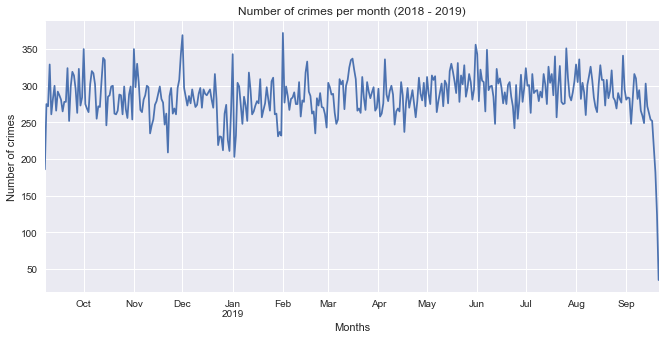

In [121]:
plt.figure(figsize=(11,5))
crime.resample('D').size().plot(legend=False)
plt.title('Number of crimes per month (2018 - 2019)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

In [146]:
crime = crime.set_index("Occurred Date Time")

In [118]:
crime.index.min()


Timestamp('2018-09-07 11:10:00')

In [119]:
crime.index.max()

Timestamp('2019-09-21 21:13:00')

In [125]:
crime = crime.reset_index()

In [131]:
crime["dayofcrime"] = crime["Occurred Date Time"].dt.day_name()

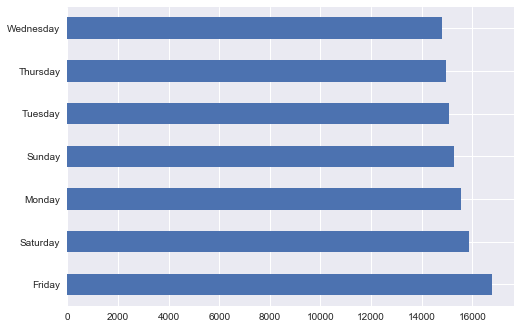

In [136]:
crime["Occurred Date Time"].dt.day_name().value_counts().plot(kind="barh")

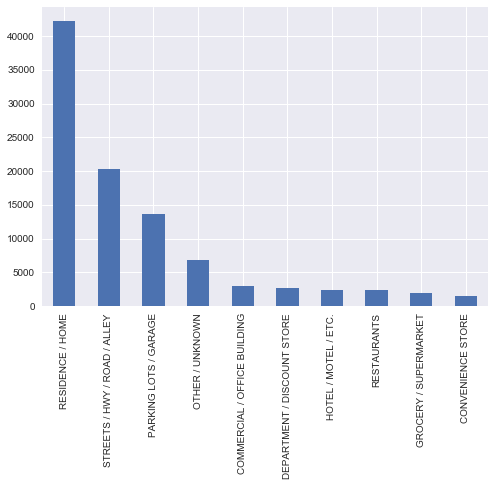

In [145]:
crime["Location Type"].value_counts(ascending=False).head(10).plot(kind="bar")

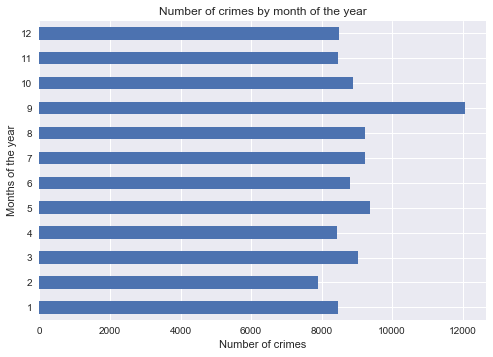

In [150]:
crime.groupby([crime.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

In [175]:
crime["Occurred_to_report"] = crime["Report Date Time"] - crime["Occurred Date Time"]

In [183]:
crime["Occurred_to_report"].mean()

Timedelta('2 days 08:51:43.985345')

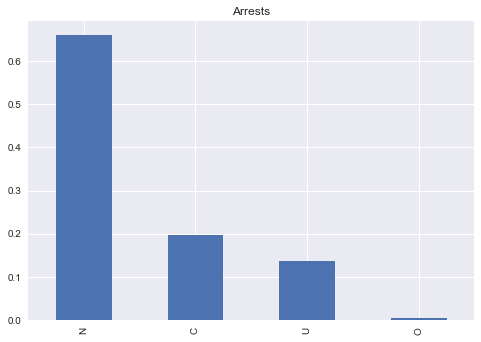

In [184]:
crime['Clearance Status'].value_counts(normalize=True).plot.bar()
plt.title("Arrests")
plt.show()

In [15]:
crime_2019.drop(['Category Description'], inplace=True, axis=1)

C:\Users\plahoti\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


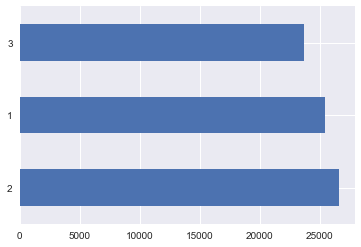

In [30]:
crime_2019["crime_quarter"].value_counts().plot(kind="barh")